# Exploratory Data Analysis - Electrodermal Activity

In [49]:
# Import libraries
import logging
import os
import os.path as op
import pathlib

import numpy as np
import matplotlib.pyplot as plt
import mne
from hampel import hampel

from subject_number import subject_number
import neurokit2 as nk

from aux_functions import cvxEDA_pyEDA

### Plot raw EDA

Opening raw data file outputs/DEAP-bids/derivatives/mne-bids-pipeline/sub-26\eeg\sub-26_task-rest_proc-filt_raw.fif...
    Range : 0 ... 2003455 =      0.000 ...  3912.998 secs
Ready.
Reading 0 ... 2003455  =      0.000 ...  3912.998 secs...


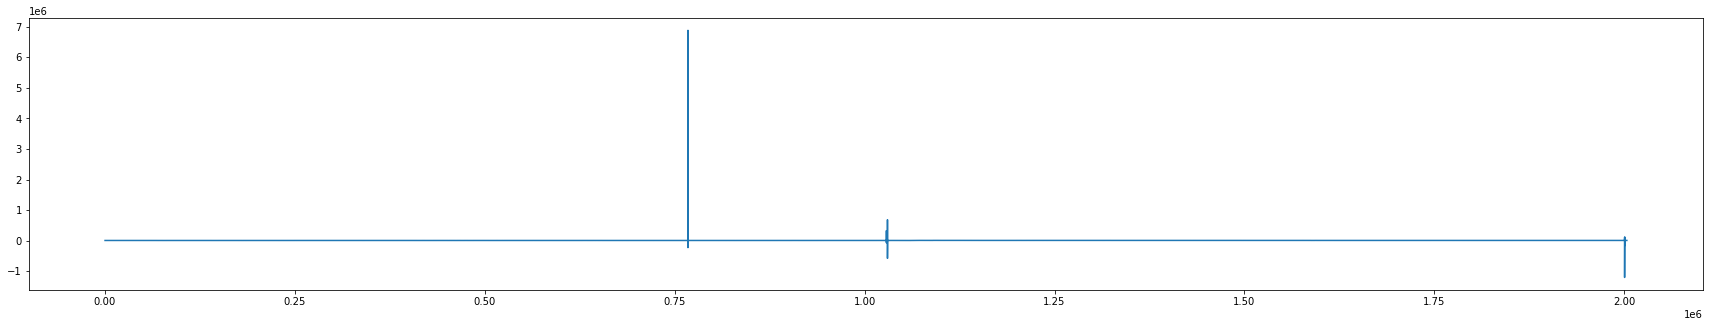

In [33]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [30, 5] 

# Open data subject 3
number_subject = '26'

# open .fif filtered raw files
extension = '.fif'
directory = 'outputs/DEAP-bids/derivatives/mne-bids-pipeline/'
fname_fif = op.join(directory, 'sub-' + number_subject , 'eeg',
                    'sub-' + number_subject + '_task-rest_proc-filt_raw' + extension)
raw = mne.io.read_raw_fif(fname_fif, preload=True) 

# Extract just EDA data 
raw_eda = raw.copy().pick_channels(ch_names=['EDA']).get_data()
raw_eda = np.squeeze(raw_eda)
plt.plot(raw_eda)


### Plot EDA 

In [3]:
def plot_eda(eda):
    """Plot the EDA signal."""
    times = [i/(512*60) for i in range(len(eda))]
    fig, ax = plt.subplots(1, 1, figsize=[20, 4])
    ax.plot(times, eda, color='r', alpha = 0.5)
    ax.set_xlabel('Time(mins)')
    ax.set_ylabel('EDA')
    #ax.set_title(f'{eda.name}')
    ax.legend()
    plt.show()

#### Plot distribution Raw EDA time series

Opening raw data file outputs/DEAP-bids/derivatives/mne-bids-pipeline/sub-32\eeg\sub-32_task-rest_proc-filt_raw.fif...
    Range : 0 ... 1804287 =      0.000 ...  3523.998 secs
Ready.
Reading 0 ... 1804287  =      0.000 ...  3523.998 secs...


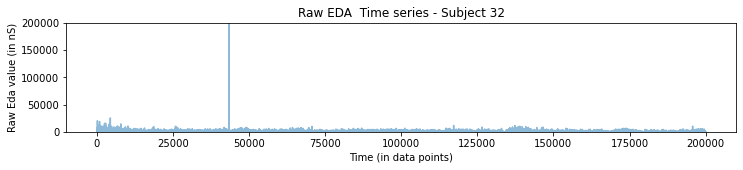

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['figure.figsize'] = [12, 2] 

#subjects = ['23', '24', '25', '26', '27', '28', '29', '30', '31', '32']
subjects = ['32']

for subject in subjects:
    # open .fif filtered raw files
    extension = '.fif'
    directory = 'outputs/DEAP-bids/derivatives/mne-bids-pipeline/'
    fname_fif = op.join(directory, 'sub-' + subject , 'eeg',
                        'sub-' + subject + '_task-rest_proc-filt_raw' + extension)
    raw = mne.io.read_raw_fif(fname_fif, preload=True) 

    # Extract just EDA data 
    raw_eda = raw.copy().pick_channels(ch_names=['EDA_SMNA']).get_data()
    raw_eda = np.squeeze(raw_eda)
    y = raw_eda
    y = y[:len(y)-int(len(y)/20)][1400000:1600000]
    #y = hampel(pd.Series(y), window_size=5, n=3, imputation=True)

    # the histogram of the data
    plt.plot(y, markerfacecolor='r', alpha=0.5)


    plt.xlabel('Time (in data points)')
    plt.ylabel('Raw Eda value (in nS)')
    plt.ylim(0, 200000)
    plt.title(f'Raw EDA  Time series - Subject {subject}')
    plt.show()

#### Plot distribution Raw EDA variable

Opening raw data file outputs/DEAP-bids/derivatives/mne-bids-pipeline/sub-01\eeg\sub-01_task-rest_proc-filt_raw.fif...
    Range : 0 ... 1980927 =      0.000 ...  3868.998 secs
Ready.
Reading 0 ... 1980927  =      0.000 ...  3868.998 secs...


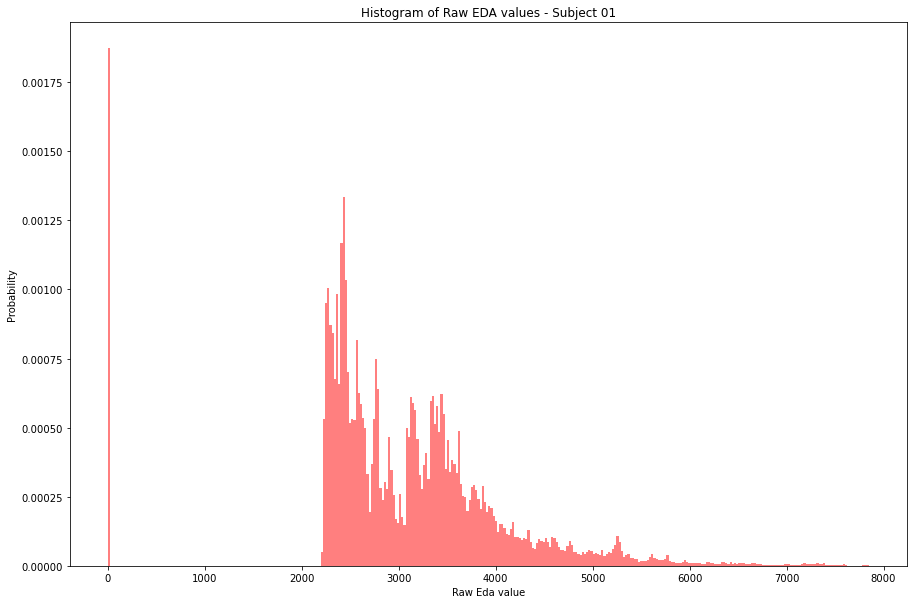

Opening raw data file outputs/DEAP-bids/derivatives/mne-bids-pipeline/sub-02\eeg\sub-02_task-rest_proc-filt_raw.fif...
    Range : 0 ... 1895935 =      0.000 ...  3702.998 secs
Ready.
Reading 0 ... 1895935  =      0.000 ...  3702.998 secs...


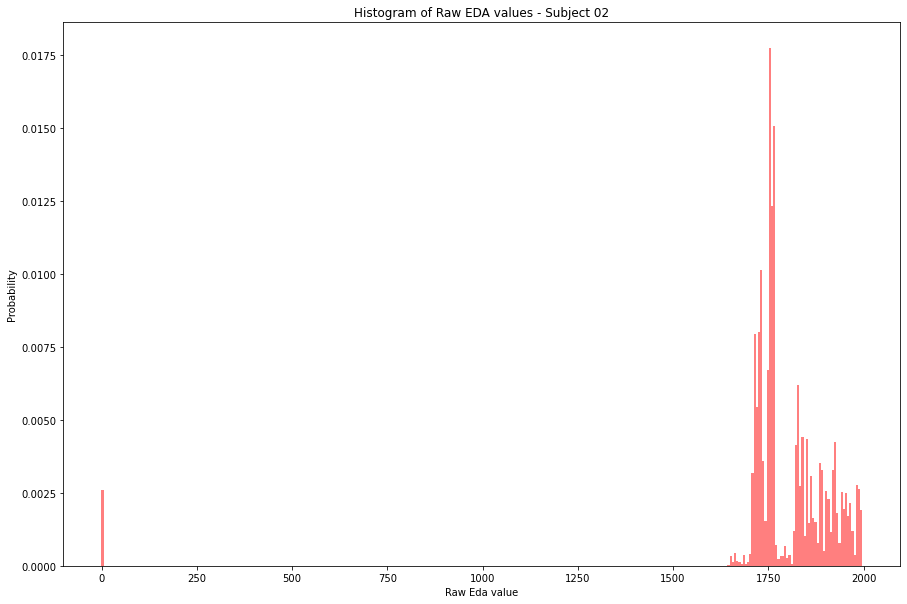

Opening raw data file outputs/DEAP-bids/derivatives/mne-bids-pipeline/sub-03\eeg\sub-03_task-rest_proc-filt_raw.fif...
    Range : 0 ... 1989119 =      0.000 ...  3884.998 secs
Ready.
Reading 0 ... 1989119  =      0.000 ...  3884.998 secs...


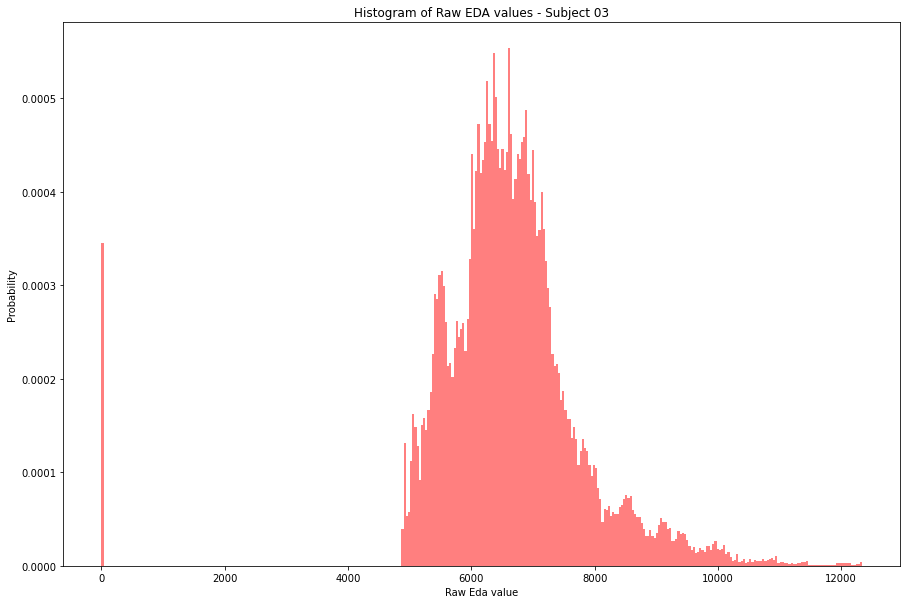

Opening raw data file outputs/DEAP-bids/derivatives/mne-bids-pipeline/sub-04\eeg\sub-04_task-rest_proc-filt_raw.fif...
    Range : 0 ... 1690111 =      0.000 ...  3300.998 secs
Ready.
Reading 0 ... 1690111  =      0.000 ...  3300.998 secs...


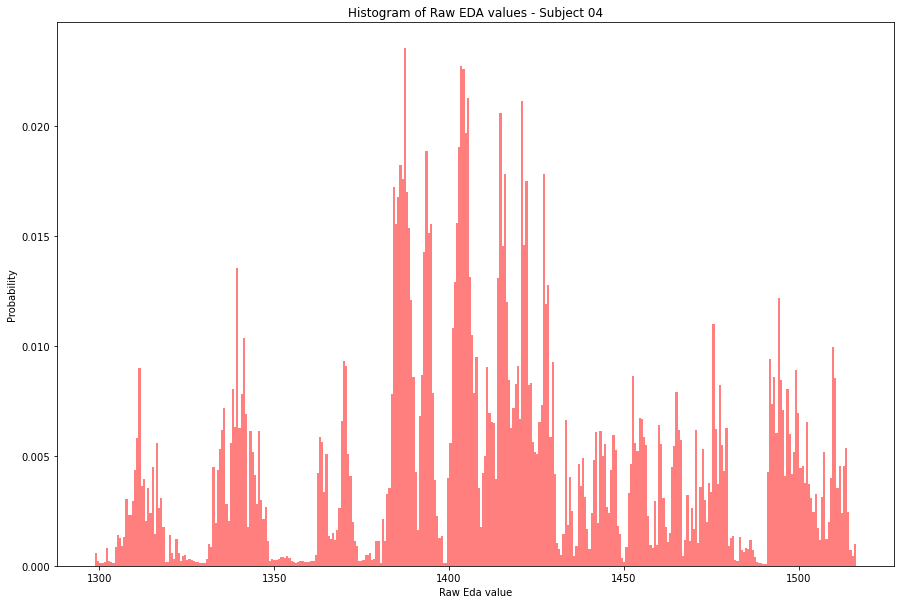

Opening raw data file outputs/DEAP-bids/derivatives/mne-bids-pipeline/sub-05\eeg\sub-05_task-rest_proc-filt_raw.fif...
    Range : 0 ... 2004991 =      0.000 ...  3915.998 secs
Ready.
Reading 0 ... 2004991  =      0.000 ...  3915.998 secs...


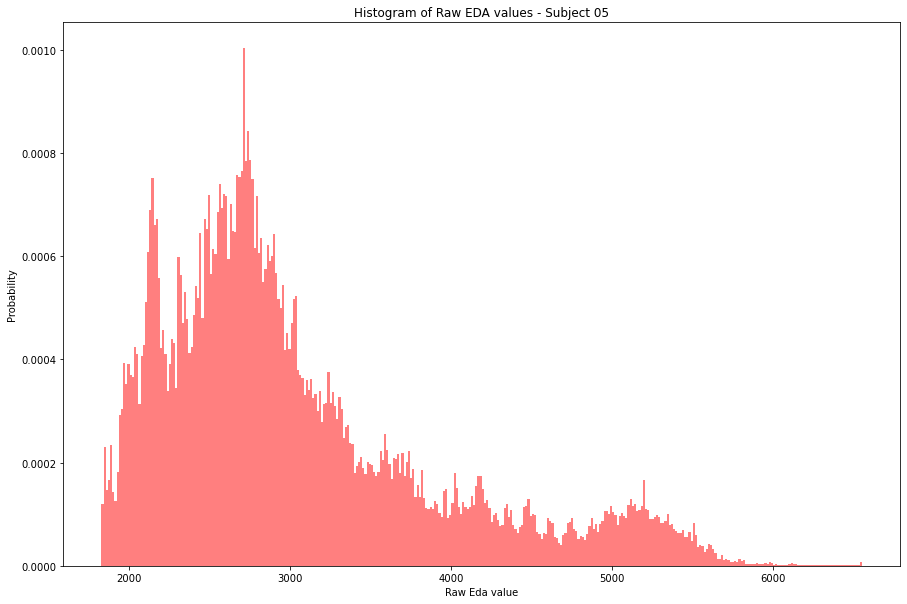

In [21]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [15, 10] 

subjects = ['01', '02', '03', '04', '05']

for subject in subjects:
    # open .fif filtered raw files
    extension = '.fif'
    directory = 'outputs/DEAP-bids/derivatives/mne-bids-pipeline/'
    fname_fif = op.join(directory, 'sub-' + subject , 'eeg',
                        'sub-' + subject + '_task-rest_proc-filt_raw' + extension)
    raw = mne.io.read_raw_fif(fname_fif, preload=True) 

    # Extract just EDA data 
    raw_eda = raw.copy().pick_channels(ch_names=['EDA']).get_data()
    raw_eda = np.squeeze(raw_eda)


    # the histogram of the data
    plt.hist(raw_eda, 350, density=True, facecolor='r', alpha=0.5)


    plt.xlabel('Raw Eda value')
    plt.ylabel('Probability')
    plt.title(f'Histogram of Raw EDA values - Subject {subject}')
    plt.show()

#### Plot Raw EDA PSD

In [46]:
raw.info['ch_names']

['Fp1',
 'AF3',
 'F7',
 'F3',
 'FC1',
 'FC5',
 'T7',
 'C3',
 'CP1',
 'CP5',
 'P7',
 'P3',
 'Pz',
 'PO3',
 'O1',
 'Oz',
 'O2',
 'PO4',
 'P4',
 'P8',
 'CP6',
 'CP2',
 'C4',
 'T8',
 'FC6',
 'FC2',
 'F4',
 'F8',
 'AF4',
 'Fp2',
 'Fz',
 'Cz',
 'EXG1',
 'EXG2',
 'EXG3',
 'EXG4',
 'EXG5',
 'EXG6',
 'EXG7',
 'EXG8',
 'EDA',
 'Resp',
 'Plet',
 'Temp',
 'EDA_Phasic',
 'EDA_Tonic',
 'EDA_SMNA',
 'EMG_Amplitude_5',
 'EMG_Amplitude_6',
 'EOG_Cleaned']

Opening raw data file outputs/DEAP-bids/derivatives/mne-bids-pipeline/sub-01\eeg\sub-01_task-rest_proc-filt_raw.fif...
    Range : 0 ... 1980927 =      0.000 ...  3868.998 secs
Ready.
Reading 0 ... 1980927  =      0.000 ...  3868.998 secs...
Setting 647772 of 1980928 (32.70%) samples to NaN, retaining 1333156 (67.30%) samples.
Effective window size : 4.000 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.3s finished


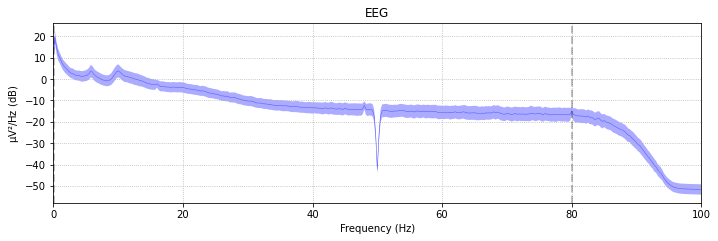

Setting 647772 of 1980928 (32.70%) samples to NaN, retaining 1333156 (67.30%) samples.
Effective window size : 4.000 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


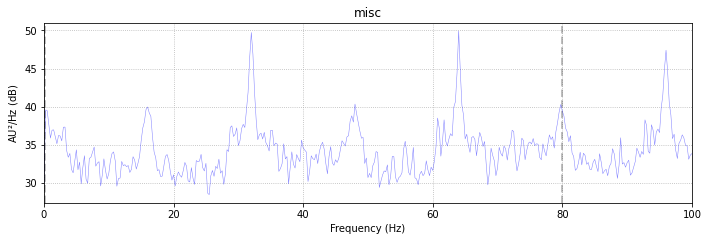

Setting 647772 of 1980928 (32.70%) samples to NaN, retaining 1333156 (67.30%) samples.
Effective window size : 4.000 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


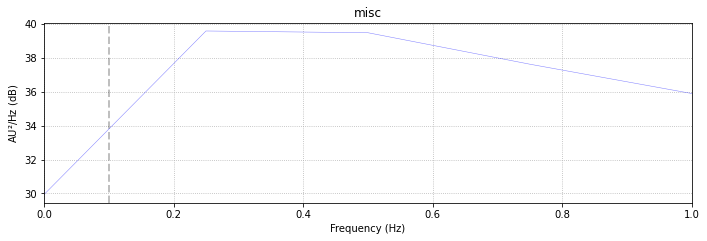

Opening raw data file outputs/DEAP-bids/derivatives/mne-bids-pipeline/sub-02\eeg\sub-02_task-rest_proc-filt_raw.fif...
    Range : 0 ... 1895935 =      0.000 ...  3702.998 secs
Ready.
Reading 0 ... 1895935  =      0.000 ...  3702.998 secs...
Setting 562771 of 1895936 (29.68%) samples to NaN, retaining 1333165 (70.32%) samples.
Effective window size : 4.000 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.0s finished


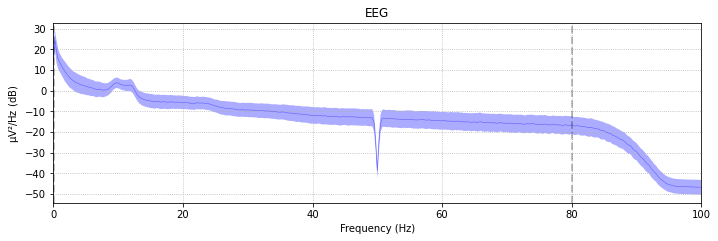

Setting 562771 of 1895936 (29.68%) samples to NaN, retaining 1333165 (70.32%) samples.
Effective window size : 4.000 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


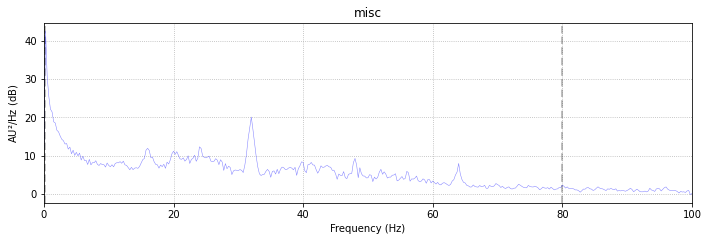

Setting 562771 of 1895936 (29.68%) samples to NaN, retaining 1333165 (70.32%) samples.
Effective window size : 4.000 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


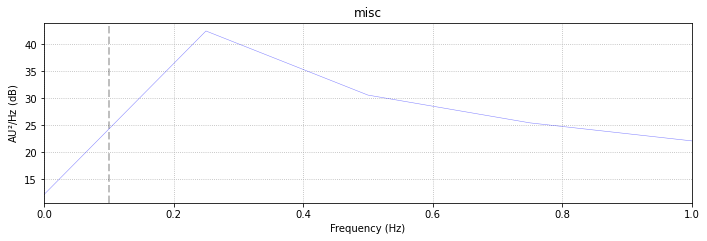

Opening raw data file outputs/DEAP-bids/derivatives/mne-bids-pipeline/sub-03\eeg\sub-03_task-rest_proc-filt_raw.fif...
    Range : 0 ... 1989119 =      0.000 ...  3884.998 secs
Ready.
Reading 0 ... 1989119  =      0.000 ...  3884.998 secs...
Setting 655970 of 1989120 (32.98%) samples to NaN, retaining 1333150 (67.02%) samples.
Effective window size : 4.000 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.4s finished


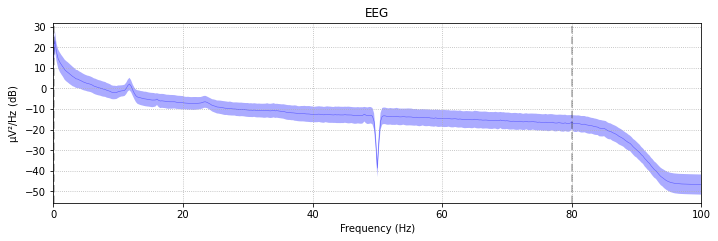

Setting 655970 of 1989120 (32.98%) samples to NaN, retaining 1333150 (67.02%) samples.
Effective window size : 4.000 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


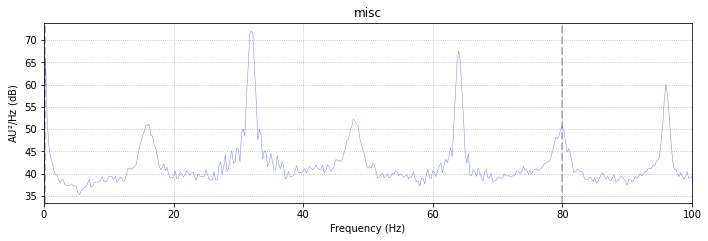

Setting 655970 of 1989120 (32.98%) samples to NaN, retaining 1333150 (67.02%) samples.
Effective window size : 4.000 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


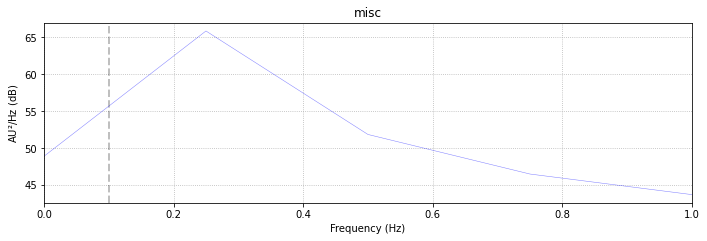

Opening raw data file outputs/DEAP-bids/derivatives/mne-bids-pipeline/sub-04\eeg\sub-04_task-rest_proc-filt_raw.fif...
    Range : 0 ... 1690111 =      0.000 ...  3300.998 secs
Ready.
Reading 0 ... 1690111  =      0.000 ...  3300.998 secs...
Setting 356935 of 1690112 (21.12%) samples to NaN, retaining 1333177 (78.88%) samples.
Effective window size : 4.000 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.7s finished


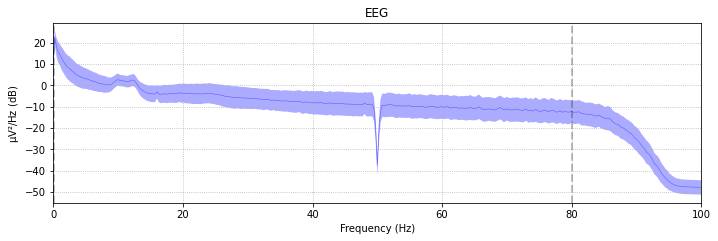

Setting 356935 of 1690112 (21.12%) samples to NaN, retaining 1333177 (78.88%) samples.
Effective window size : 4.000 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


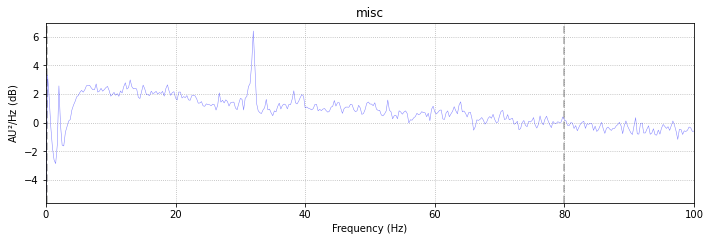

Setting 356935 of 1690112 (21.12%) samples to NaN, retaining 1333177 (78.88%) samples.
Effective window size : 4.000 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


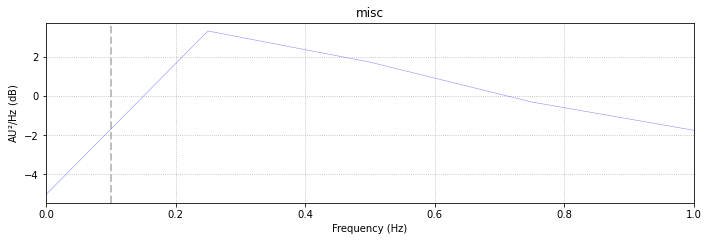

Opening raw data file outputs/DEAP-bids/derivatives/mne-bids-pipeline/sub-05\eeg\sub-05_task-rest_proc-filt_raw.fif...
    Range : 0 ... 2004991 =      0.000 ...  3915.998 secs
Ready.
Reading 0 ... 2004991  =      0.000 ...  3915.998 secs...
Setting 671838 of 2004992 (33.51%) samples to NaN, retaining 1333154 (66.49%) samples.
Effective window size : 4.000 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.7s finished


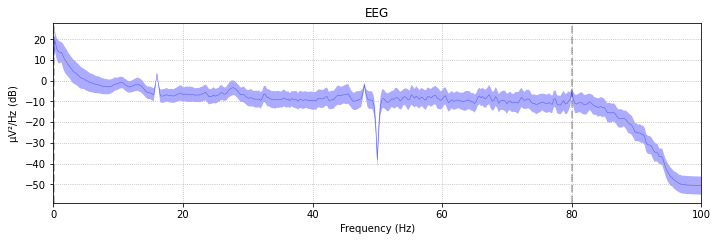

Setting 671838 of 2004992 (33.51%) samples to NaN, retaining 1333154 (66.49%) samples.
Effective window size : 4.000 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


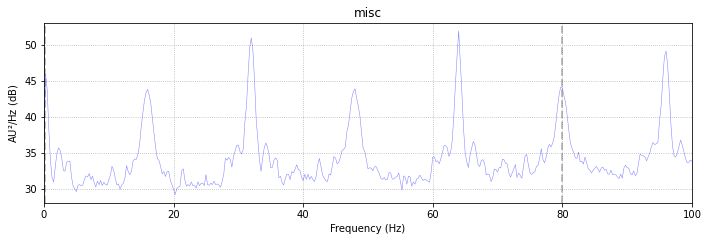

Setting 671838 of 2004992 (33.51%) samples to NaN, retaining 1333154 (66.49%) samples.
Effective window size : 4.000 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


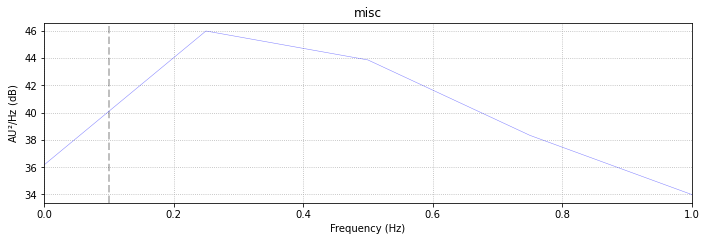

In [43]:
 
import numpy as np
import matplotlib.pyplot as plt

#plt.rcParams['figure.figsize'] = [12, 2] 

subjects = ['01', '02', '03', '04', '05']

for subject in subjects:
    # open .fif filtered raw files
    extension = '.fif'
    directory = 'outputs/DEAP-bids/derivatives/mne-bids-pipeline/'
    fname_fif = op.join(directory, 'sub-' + subject , 'eeg',
                        'sub-' + subject + '_task-rest_proc-filt_raw' + extension)
    raw = mne.io.read_raw_fif(fname_fif, preload=True) 

    # Extract just EDA data 
    #raw_eda = raw.copy().pick_channels(ch_names=['EDA'])
    picks_eda = mne.pick_channels(ch_names = raw.ch_names ,include=['EDA_SMNA'])
    picks_eeg = mne.pick_types(raw.info , eeg=True)
    mne.viz.plot_raw_psd(raw, picks =  picks_eeg, xscale = 'linear',  fmax = 100,
                    reject_by_annotation=True, color = 'b', line_alpha=0.5, average=True)
    mne.viz.plot_raw_psd(raw, picks = picks_eda, xscale = 'linear',  fmax = 100,
                        reject_by_annotation=True, color = 'b', line_alpha=0.5, average=True)
    mne.viz.plot_raw_psd(raw, picks = picks_eda, xscale = 'linear',  fmax = 1,
                    reject_by_annotation=True, color = 'b', line_alpha=0.5, average=True)



#### Plot Phasic EDA

No handles with labels found to put in legend.


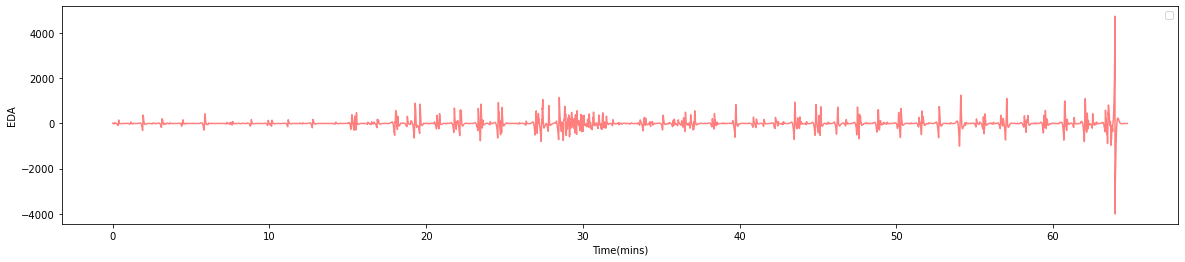

In [159]:
plot_eda(signals["EDA_Phasic"])


#### Plot Tonic EDA

No handles with labels found to put in legend.


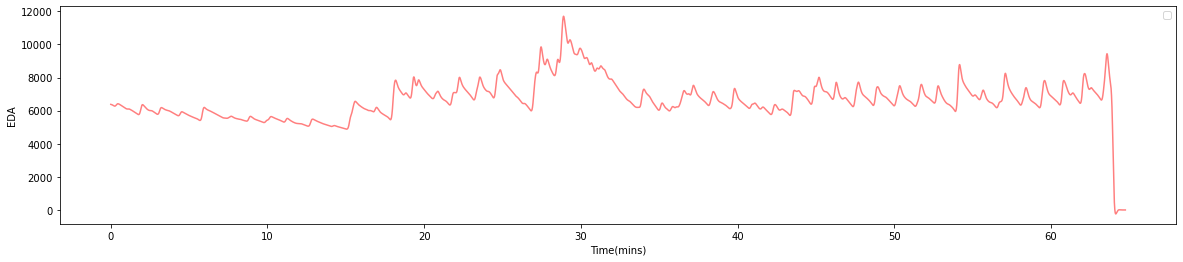

In [160]:
plot_eda(signals["EDA_Tonic"])


In [161]:
raw_eda_crop = np.array_split(raw_eda, 20)

Minutes of each EDA chunk -> ~ 3 mins and 15 secs

In [164]:
raw_eda_crop[19].shape[0] / 512 / 60

3.2375

In [119]:
del raw_eda
del raw
del signals


No handles with labels found to put in legend.


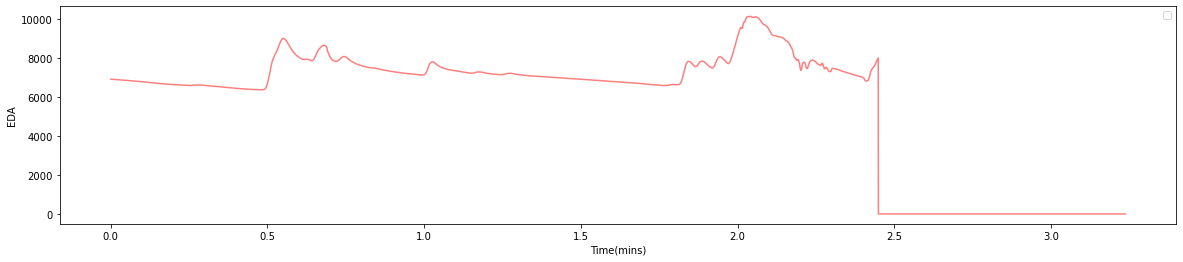

In [165]:
plot_eda(raw_eda_crop[19])

In [170]:
# Importing necessary libraries
import numpy as np
import cvxopt as cv
import cvxopt.solvers

def cvxEDA_pyEDA(y, delta, tau0=2., tau1=0.7, delta_knot=10., alpha=8e-4, gamma=1e-2,
           solver=None, options={'reltol':1e-9}):
    """CVXEDA Convex optimization approach to electrodermal activity processing
    This function implements the cvxEDA algorithm described in "cvxEDA: a
    Convex Optimization Approach to Electrodermal Activity Processing"
    (http://dx.doi.org/10.1109/TBME.2015.2474131, also available from the
    authors' homepages).
    Arguments:
       y: observed EDA signal (we recommend normalizing it: y = zscore(y))
       delta: sampling interval (in seconds) of y
       tau0: slow time constant of the Bateman function
       tau1: fast time constant of the Bateman function
       delta_knot: time between knots of the tonic spline function
       alpha: penalization for the sparse SMNA driver
       gamma: penalization for the tonic spline coefficients
       solver: sparse QP solver to be used, see cvxopt.solvers.qp
       options: solver options, see:
                http://cvxopt.org/userguide/coneprog.html#algorithm-parameters
    Returns (see paper for details):
       r: phasic component
       p: sparse SMNA driver of phasic component
       t: tonic component
       l: coefficients of tonic spline
       d: offset and slope of the linear drift term
       e: model residuals
       obj: value of objective function being minimized (eq 15 of paper)
    """

    n = len(y)
    y = cv.matrix(y)

    # bateman ARMA model
    a1 = 1./min(tau1, tau0) # a1 > a0
    a0 = 1./max(tau1, tau0)
    ar = np.array([(a1*delta + 2.) * (a0*delta + 2.), 2.*a1*a0*delta**2 - 8.,
        (a1*delta - 2.) * (a0*delta - 2.)]) / ((a1 - a0) * delta**2)
    ma = np.array([1., 2., 1.])

    # matrices for ARMA model
    i = np.arange(2, n)
    A = cv.spmatrix(np.tile(ar, (n-2,1)), np.c_[i,i,i], np.c_[i,i-1,i-2], (n,n))
    M = cv.spmatrix(np.tile(ma, (n-2,1)), np.c_[i,i,i], np.c_[i,i-1,i-2], (n,n))

    # spline
    delta_knot_s = int(round(delta_knot / delta))
    spl = np.r_[np.arange(1.,delta_knot_s), np.arange(delta_knot_s, 0., -1.)] # order 1
    spl = np.convolve(spl, spl, 'full')
    spl /= max(spl)
    # matrix of spline regressors
    i = np.c_[np.arange(-(len(spl)//2), (len(spl)+1)//2)] + np.r_[np.arange(0, n, delta_knot_s)]
    nB = i.shape[1]
    j = np.tile(np.arange(nB), (len(spl),1))
    p = np.tile(spl, (nB,1)).T
    valid = (i >= 0) & (i < n)
    B = cv.spmatrix(p[valid], i[valid], j[valid])

    # trend
    C = cv.matrix(np.c_[np.ones(n), np.arange(1., n+1.)/n])
    nC = C.size[1]

    # Solve the problem:
    # .5*(M*q + B*l + C*d - y)^2 + alpha*sum(A,1)*p + .5*gamma*l'*l
    # s.t. A*q >= 0

    old_options = cv.solvers.options.copy()
    cv.solvers.options.clear()
    cv.solvers.options.update(options)
    if solver == 'conelp':
        # Use conelp
        z = lambda m,n: cv.spmatrix([],[],[],(m,n))
        G = cv.sparse([[-A,z(2,n),M,z(nB+2,n)],[z(n+2,nC),C,z(nB+2,nC)],
                    [z(n,1),-1,1,z(n+nB+2,1)],[z(2*n+2,1),-1,1,z(nB,1)],
                    [z(n+2,nB),B,z(2,nB),cv.spmatrix(1.0, range(nB), range(nB))]])
        h = cv.matrix([z(n,1),.5,.5,y,.5,.5,z(nB,1)])
        c = cv.matrix([(cv.matrix(alpha, (1,n)) * A).T,z(nC,1),1,gamma,z(nB,1)])
        res = cv.solvers.conelp(c, G, h, dims={'l':n,'q':[n+2,nB+2],'s':[]})
        obj = res['primal objective']
    else:
        # Use qp
        Mt, Ct, Bt = M.T, C.T, B.T
        H = cv.sparse([[Mt*M, Ct*M, Bt*M], [Mt*C, Ct*C, Bt*C], 
                    [Mt*B, Ct*B, Bt*B+gamma*cv.spmatrix(1.0, range(nB), range(nB))]])
        f = cv.matrix([(cv.matrix(alpha, (1,n)) * A).T - Mt*y,  -(Ct*y), -(Bt*y)])
        res = cv.solvers.qp(H, f, cv.spmatrix(-A.V, A.I, A.J, (n,len(f))),
                            cv.matrix(0., (n,1)), solver=solver)
        obj = res['primal objective'] + .5 * (y.T * y)
    cv.solvers.options.clear()
    cv.solvers.options.update(old_options)

    l = res['x'][-nB:]
    d = res['x'][n:n+nC]
    t = B*l + C*d
    q = res['x'][:n]
    p = A * q
    r = M * q
    e = y - r - t

    return (np.array(a).ravel() for a in (r, p, t, l, d, e, obj))

In [202]:
[phasic_gsr, p, tonic_gsr, _ , _ , _ , _] = cvxEDA_pyEDA(raw_eda_crop[19],1./512)

     pcost       dcost       gap    pres   dres
 0: -2.6944e+12 -2.6928e+12  2e+10  1e+05  1e+00
 1: -2.6947e+12 -2.6978e+12  2e+10  1e+05  1e+00
 2: -2.6955e+12 -2.6994e+12  5e+09  2e+04  3e-01
 3: -2.6957e+12 -2.6978e+12  2e+09  9e+03  1e-01
 4: -2.6958e+12 -2.6977e+12  2e+09  6e+03  7e-02
 5: -2.6958e+12 -2.6965e+12  7e+08  2e+03  2e-02
 6: -2.6958e+12 -2.6963e+12  5e+08  1e+03  2e-02
 7: -2.6958e+12 -2.6961e+12  2e+08  5e+02  7e-03
 8: -2.6958e+12 -2.6960e+12  2e+08  4e+02  5e-03
 9: -2.6958e+12 -2.6959e+12  1e+08  2e+02  2e-03
10: -2.6958e+12 -2.6959e+12  1e+08  1e+02  2e-03
11: -2.6958e+12 -2.6959e+12  6e+07  7e+01  9e-04
12: -2.6958e+12 -2.6959e+12  6e+07  7e+01  9e-04
13: -2.6958e+12 -2.6959e+12  5e+07  5e+01  6e-04
14: -2.6958e+12 -2.6959e+12  3e+07  3e+01  4e-04
15: -2.6958e+12 -2.6959e+12  3e+07  3e+01  4e-04
16: -2.6958e+12 -2.6959e+12  3e+07  2e+01  3e-04
17: -2.6958e+12 -2.6959e+12  2e+07  1e+01  2e-04
18: -2.6958e+12 -2.6959e+12  2e+07  1e+01  2e-04
19: -2.6958e+12 -2.69

In [192]:
cvx_aux[2][-1]

-47205.12031374217

In [193]:
cvx = np.empty([3,0])
for i in range(len(raw_eda_crop)):
    [phasic_gsr, p, tonic_gsr, _ , _ , _ , _] = cvxEDA_pyEDA(raw_eda_crop[i],1./512)
    if i == len(raw_eda_crop)-1:
        phasic_gsr = np.zeros(len(raw_eda_crop[i])) # full with zeros
        tonic_gsr = np.full(len(raw_eda_crop[i]), cvx_aux[2][-1]) # full with last value of previous chunk
    cvx_aux = np.vstack((phasic_gsr, p, tonic_gsr))
    cvx = np.hstack((cvx, cvx_aux))

     pcost       dcost       gap    pres   dres
 0: -1.8515e+12 -1.8514e+12  2e+09  3e+04  6e-01
 1: -1.8515e+12 -1.8517e+12  2e+09  3e+04  5e-01
 2: -1.8515e+12 -1.8519e+12  4e+08  6e+03  1e-01
 3: -1.8515e+12 -1.8517e+12  1e+08  1e+03  3e-02
 4: -1.8515e+12 -1.8516e+12  5e+07  4e+02  8e-03
 5: -1.8515e+12 -1.8516e+12  1e+07  1e+02  2e-03
 6: -1.8515e+12 -1.8515e+12  4e+06  2e+01  5e-04
 7: -1.8515e+12 -1.8515e+12  2e+06  7e+00  1e-04
 8: -1.8515e+12 -1.8515e+12  3e+05  1e+00  3e-05
 9: -1.8515e+12 -1.8515e+12  1e+05  4e-01  8e-06
10: -1.8515e+12 -1.8515e+12  4e+04  6e-02  1e-06
11: -1.8515e+12 -1.8515e+12  3e+04  3e-02  5e-07
12: -1.8515e+12 -1.8515e+12  1e+04  1e-02  3e-07
13: -1.8515e+12 -1.8515e+12  9e+03  7e-03  1e-07
14: -1.8515e+12 -1.8515e+12  4e+03  3e-03  6e-08
15: -1.8515e+12 -1.8515e+12  2e+03  8e-04  2e-08
16: -1.8515e+12 -1.8515e+12  7e+02  2e-04  4e-09
17: -1.8515e+12 -1.8515e+12  6e+02  1e-04  2e-09
18: -1.8515e+12 -1.8515e+12  2e+02  3e-05  7e-10
19: -1.8515e+12 -1.85

# SEGUIR DESDE ACA -> plotear para ver si ahora los datos se ven mejor (luego de reemplazar chunk outlier)

No handles with labels found to put in legend.


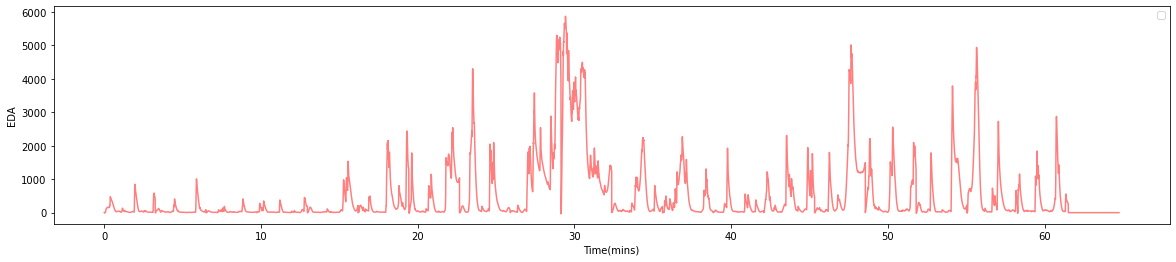

In [194]:
plot_eda(cvx[0])

No handles with labels found to put in legend.


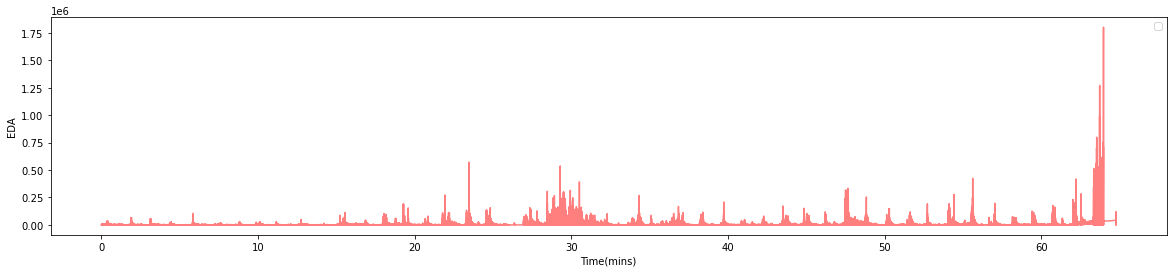

In [195]:
plot_eda(cvx[1])

No handles with labels found to put in legend.


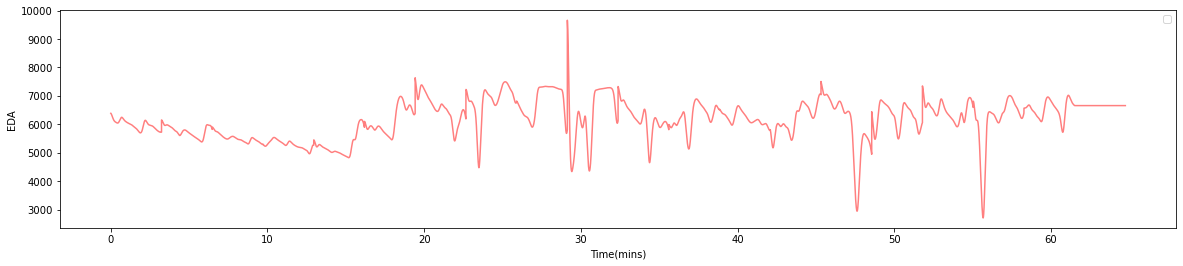

In [197]:
plot_eda(cvx[2])

In [148]:
raw_eda_crop_1_to_5 = raw_eda[:497280]

In [149]:
[phasic_gsr, p, tonic_gsr, _ , _ , _ , _] = cvxEDA_pyEDA(raw_eda_crop_1_to_5, 1./512)

     pcost       dcost       gap    pres   dres
 0: -7.9895e+12 -7.9890e+12  2e+10  1e+05  2e-01
 1: -7.9897e+12 -7.9954e+12  2e+10  8e+04  1e-01
 2: -7.9899e+12 -7.9932e+12  4e+09  2e+04  3e-02
 3: -7.9899e+12 -7.9907e+12  8e+08  3e+03  5e-03
 4: -7.9900e+12 -7.9901e+12  2e+08  6e+02  1e-03
 5: -7.9900e+12 -7.9900e+12  4e+07  1e+02  2e-04
 6: -7.9900e+12 -7.9900e+12  2e+07  4e+01  6e-05
 7: -7.9900e+12 -7.9900e+12  7e+06  1e+01  2e-05
 8: -7.9900e+12 -7.9900e+12  4e+06  5e+00  8e-06
 9: -7.9900e+12 -7.9900e+12  9e+05  9e-01  1e-06
10: -7.9900e+12 -7.9900e+12  5e+05  3e-01  5e-07
11: -7.9900e+12 -7.9900e+12  2e+05  2e-01  2e-07
12: -7.9900e+12 -7.9900e+12  1e+05  8e-02  1e-07
13: -7.9900e+12 -7.9900e+12  1e+05  5e-02  7e-08
14: -7.9900e+12 -7.9900e+12  7e+04  3e-02  4e-08
15: -7.9900e+12 -7.9900e+12  4e+04  2e-02  2e-08
16: -7.9900e+12 -7.9900e+12  2e+04  7e-03  1e-08
17: -7.9900e+12 -7.9900e+12  1e+04  3e-03  5e-09
18: -7.9900e+12 -7.9900e+12  7e+03  2e-03  2e-09
19: -7.9900e+12 -7.99

CORRER LAS SIGUIENTES LINEAS Y COMPARAR CON LOS PLOTS ANTERIORES (RAW EDA CROP TODO UNIDO VS.RAW EDA CROP TODO JUNTO)A VER SI SE PARECEN

No handles with labels found to put in legend.


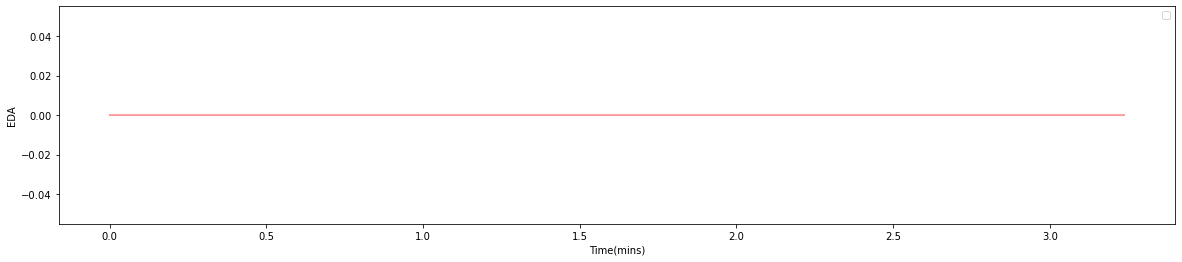

No handles with labels found to put in legend.


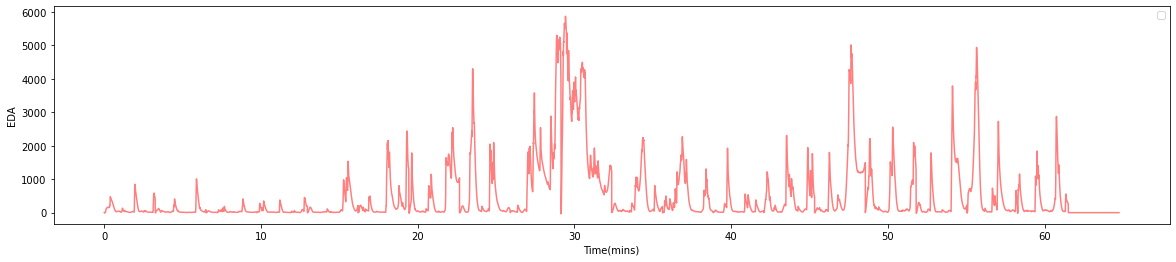

In [198]:
plot_eda(phasic_gsr)
plot_eda(cvx[0])


No handles with labels found to put in legend.


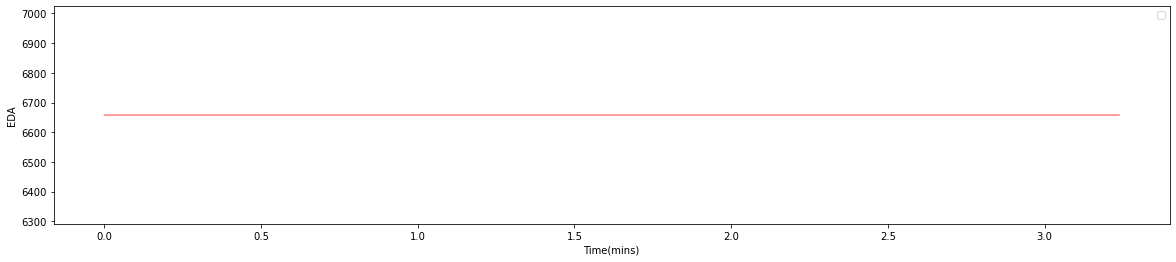

No handles with labels found to put in legend.


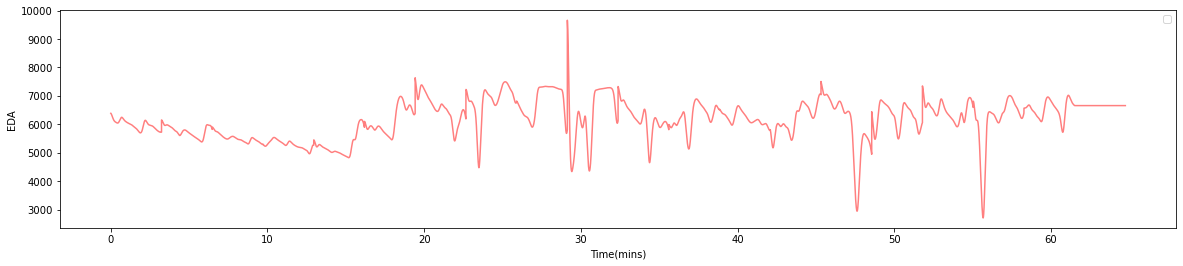

In [199]:
plot_eda(tonic_gsr)
plot_eda(cvx[2])

No handles with labels found to put in legend.


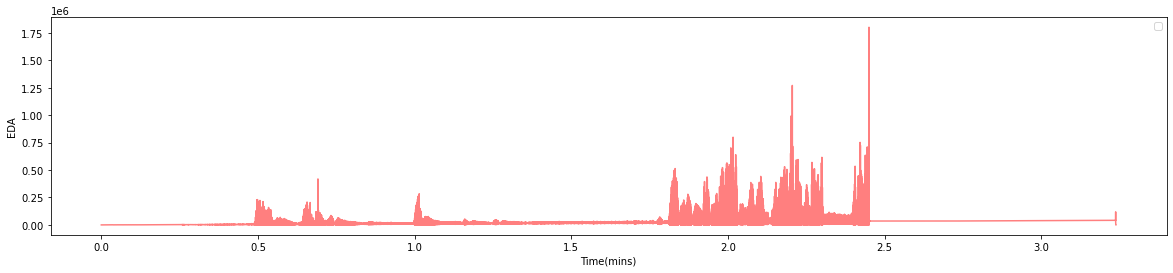

No handles with labels found to put in legend.


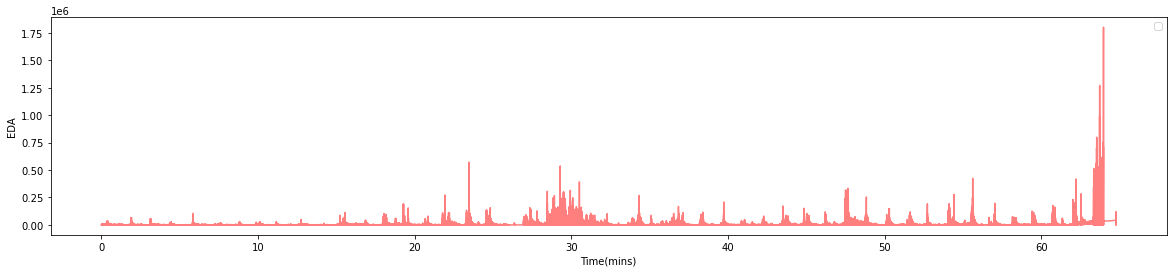

In [200]:
plot_eda(p)
plot_eda(cvx[1])

No handles with labels found to put in legend.


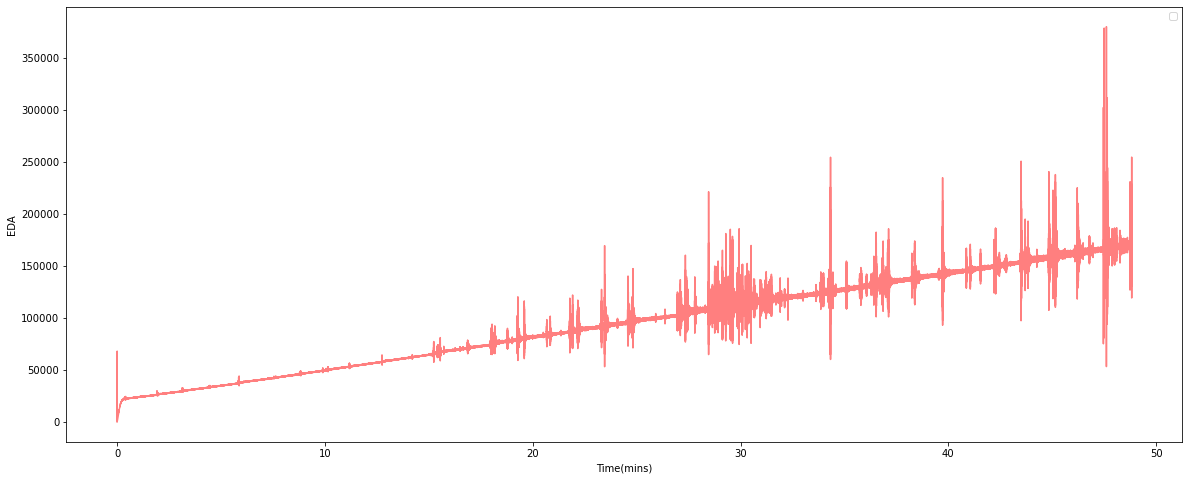

In [42]:
plot_eda(p[:1500000])

## NOT WORKING

In [14]:
def cvxEDA_codex_NOT_WORKING(y, delta, tau0 = 2, tau1 = 0.7, delta_knot = 10, alpha = 8e-4, gamma = 1e-2, solver = 'quadprog'):
    """
    This function implements the cvxEDA algorithm described in "cvxEDA: a
    Convex Optimization Approach to Electrodermal Activity Processing"
    (http://dx.doi.org/10.1109/TBME.2015.2474131 also available from the %   authors' homepages).
    
    Parameters
    ----------
    X : array_like
        Training data.
    y : array_like
        Class labels.
        
    Returns
    -------    
    r: phasic component
    p: sparse SMNA driver of phasic component
    t: tonic component
    l: coefficients of tonic spline
    d: offset and slope of the linear drift term
    e: model residuals
    obj: value of objective function being minimized (eq 15 of paper)
    
    """
    n = len(y)
    y.reshape(n,)

    # bateman ARMA model
    a1 = 1/min(tau1, tau0) # a1 > a0
    a0 = 1/max(tau1, tau0)
    ar = [(a1*delta + 2) * (a0*delta + 2), 2*a1*a0*delta**2 - 8, (a1*delta - 2) * (a0*delta - 2)] / ((a1 - a0) * delta**2)
    ma = [1 2 1]

    # matrices for ARMA model
    i = 3:n
    A = sparse([i i i], [i i-1 i-2], repmat(ar, n-2, 1), n, n)
    M = sparse([i i i], [i i-1 i-2], repmat(ma, n-2, 1), n, n)

    # spline
    delta_knot_s = round(delta_knot / delta)
    spl = [1:delta_knot_s delta_knot_s-1:-1:1]' # order 1
    spl = conv(spl, spl, 'full')
    spl = spl / max(spl)
    # matrix of spline regressors
    i = bsxfun(@plus, (0:length(spl)-1)'-floor(length(spl)/2), 1:delta_knot_s:n)
    nB = size(i, 2)
    j = repmat(1:nB, len(spl), 1)
    p = repmat(spl(:), 1, nB)
    valid = i >= 1 & i <= n
    B = sparse(i(valid), j(valid), p(valid))

    # trend
    C = [ones(n,1) (1:n)'/n]
    nC = size(C, 2)

    # Solve the problem:
    # .5*(M*q + B*l + C*d - y)^2 + alpha*sum(A,1)*p + .5*gamma*l'*l
    # s.t. A*q >= 0

    if strcmpi(solver, 'quadprog')
        # Use Matlab's quadprog
        H = [M'*M, M'*C, M'*B; C'*M, C'*C, C'*B; B'*M, B'*C, B'*B+gamma*speye(nB)]
        f = [alpha*sum(A,1)'-M'*y; -(C'*y); -(B'*y)]

        [z, obj] = quadprog(H, f, [-A zeros(n,len(f)-n)], zeros(n, 1), ...
            [], [], [], [], [], optimset('Algorithm', 'interior-point-convex', ...
            'TolFun', 1e-13))
        #z = qp([], H, f, [], [], [], [], zeros(n,1), [A zeros(n,len(f)-n)], []) 
        obj = obj + .5 * (y' * y)
    elseif strcmpi(solver, 'sedumi')
        # Use SeDuMi 
        U = [A, sparse(n,nC), -speye(n), sparse(n,n+nB+4); ...
            M, C, sparse(n,n+2), -speye(n), sparse(n,2), B; ...
            sparse(1,2*n+nC), 1, sparse(1,n+nB+3); ...
            sparse(1,3*n+nC+2), 1, sparse(1,nB+1)]
        b = [sparse(n,1); y; 1; 1]
        c = sparse([n+nC+(1:n), 2*n+nC+2, 3*n+nC+4], ...
                1, [alpha*ones(1,n), 1, gamma], 3*n+nC+nB+4, 1)
        K = struct('f', n+nC, 'l', n, 'r', [2+n 2+nB])
        pars.eps = 1e-6
        pars.chol.maxuden = 1e2
        z = sedumi(U, b, c, K, pars)
        obj = c' * z
        #objd = b' * s
    end

    l = z(end-nB+1:end)
    d = z(n+1:n+nC)
    t = B*l + C*d
    q = z(1:n)
    p = A * q
    r = M * q
    e = y - r - t

    return r, p, t, l, d, e, obj

SyntaxError: invalid syntax (Temp/ipykernel_16240/1305326894.py, line 10)